## Exploring the data

So let's learn how we set up the data. 

In [11]:
#default_exp model

In [12]:
#hide
import os, sys, warnings

In [13]:
#hide
#root = "D:/data_sets/24_garden"

In [14]:
#hide
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [15]:
#export
from fastai2.vision.all import *
from garden2.utils import *
from garden2.data import *

In [16]:
#export
splitter = IndexSplitter(range(12753, len(data)))

In [17]:
#export
block = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                  get_items=get_items,
                  get_x=get_x,
                  get_y=get_y,
                  splitter=splitter,
                  item_tfms=[Resize(224)],
                  batch_tfms=[*aug_transforms()])

In [18]:
#export
dls = block.dataloaders('', bs=64,num_workers=0)

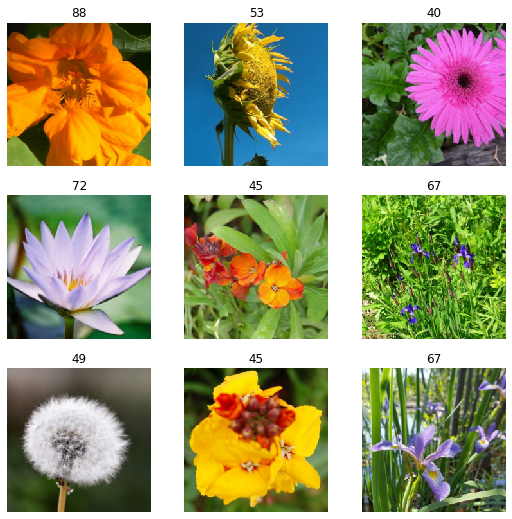

In [21]:
#hide
dls.show_batch()

In [20]:
#export
net1 = xresnet50(pretrained=False, sa=True, act_cls=Mish)